In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, Dataset
from tqdm.auto import tqdm
import gc

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Write device agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
data = 'drive/MyDrive/Course/Sem2/DLOps/data/household_power_consumption.txt'
info = df = pd.read_csv(data, sep=';', na_values=['?'],)
info.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
len(info.index)

2075259

## PreProcess the data

In [ ]:
info.drop(info.columns[[0,1]], axis=1, inplace=True)
# info.drop(info.columns[[0]], axis=1, inplace=True)

In [ ]:
info.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
col_num = len(info.columns)
def check_null(col_num, dataframe):
  for c in range(col_num):
    print(f"Null value in {dataframe.columns[c]}: {dataframe.iloc[:,c].isnull().sum()}")

# def check_zeros(col_num, dataframe):
#   for c in range(col_num):
#     print(f"Zero value in {dataframe.columns[c]}: {(dataframe.iloc[:,c] == 0).sum()}")



check_null(col_num, info)
# print()
# print("----------------------------------------------------------------------------")
# print()
# check_zeros(col_num, info)

Null value in Global_active_power: 25979
Null value in Global_reactive_power: 25979
Null value in Voltage: 25979
Null value in Global_intensity: 25979
Null value in Sub_metering_1: 25979
Null value in Sub_metering_2: 25979
Null value in Sub_metering_3: 25979


### Fill Null value with Meadian

In [ ]:
# df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())
info = info.dropna()

In [ ]:
len(info.index)

2049280

### Check for null values

In [ ]:
check_null(col_num, info)

Null value in Global_active_power: 0
Null value in Global_reactive_power: 0
Null value in Voltage: 0
Null value in Global_intensity: 0
Null value in Sub_metering_1: 0
Null value in Sub_metering_2: 0
Null value in Sub_metering_3: 0


# Split data into train test 80:20

In [ ]:
info = info.astype(float)

In [ ]:
info_numpy = info.to_numpy()
x = info_numpy[:,1:]
y = info_numpy[:,0:1]

print(x)
print()
print(y)

[[  0.418 234.84   18.4     0.      1.     17.   ]
 [  0.436 233.63   23.      0.      1.     16.   ]
 [  0.498 233.29   23.      0.      2.     17.   ]
 ...
 [  0.    239.82    3.8     0.      0.      0.   ]
 [  0.    239.7     3.8     0.      0.      0.   ]
 [  0.    239.55    3.8     0.      0.      0.   ]]

[[4.216]
 [5.36 ]
 [5.374]
 ...
 [0.938]
 [0.934]
 [0.932]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=64)

### Now Apply standard scaller on train and test data

In [ ]:
data_scaler = StandardScaler()
x_train = data_scaler.fit_transform(x_train)
x_test = data_scaler.transform(x_test)


# info_scaler = pd.DataFrame(info_scaler, columns=['Global_active_power','Global_reactive_power','Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
print(x_train)
print()
print(x_test)

[[-0.13936727 -0.69797598  0.80436687 -0.18209772 -0.22307519  1.36776797]
 [-0.40547676  1.0118755  -0.7264092  -0.18209772 -0.22307519 -0.76557799]
 [-1.09736145  0.53348745 -0.7264092  -0.18209772 -0.22307519 -0.76557799]
 ...
 [-1.09736145 -0.01280084 -0.99654616 -0.18209772 -0.22307519 -0.64705877]
 [ 0.42833299  0.01189016  0.66929839 -0.18209772 -0.22307519  1.48628719]
 [ 1.72339921 -0.0776147  -0.23115812 -0.18209772 -0.05116065 -0.76557799]]

[[ 2.14917441 -0.89241757  2.29012011 -0.18209772  0.12075388 -0.76557799]
 [ 0.87184882 -0.42637502  0.35413861 -0.18209772  0.12075388  1.36776797]
 [-0.3167736  -1.76277519 -0.7264092  -0.18209772 -0.22307519 -0.76557799]
 ...
 [-0.28129233 -0.65476674 -0.77143203 -0.18209772 -0.22307519 -0.64705877]
 [-0.58288309 -2.95102937  0.35413861 -0.18209772 -0.22307519  1.24924875]
 [-1.09736145  1.32051295 -0.81645485 -0.18209772 -0.22307519 -0.64705877]]


In [ ]:
pred_scaler = StandardScaler()
pred_scaler.fit(y_train)
y_train = pred_scaler.transform(y_train)
y_test = pred_scaler.transform(y_test)


print(y_train)
print()
print(y_test)

[[ 0.83706179]
 [-0.71861864]
 [-0.73943675]
 ...
 [-0.9570806 ]
 [ 0.7140457 ]
 [-0.27954582]]

[[ 2.30757724]
 [ 0.35635275]
 [-0.73754419]
 ...
 [-0.76971763]
 [ 0.36013786]
 [-0.78107296]]


## Make DataLoader

In [ ]:
class Makedataset(Dataset):
    def __init__(self, x, y, sequence_length=5):
        
        self.sequence_length = sequence_length
        self.X = x
        self.y = y

    def __len__(self):
        
        return self.X.shape[0]

    def __getitem__(self, i): 
        
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i].item()

In [ ]:
def numpy_to_dataLoader(x, y, batch_size, shuffle, sequence_num=5):
  # transform to torch tensor
  tensor_x = torch.Tensor(x) 
  tensor_y = torch.Tensor(y)

  # create your datset
  my_dataset = Makedataset(tensor_x,tensor_y) 

  # create your dataloader
  my_dataloader = DataLoader(my_dataset, batch_size = batch_size, shuffle = shuffle) 

  return my_dataloader


In [ ]:
BATCH_SIZE = 64

train_dataloader = numpy_to_dataLoader(x_train, y_train, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = numpy_to_dataLoader(x_test, y_test, batch_size = BATCH_SIZE, shuffle = False)

In [ ]:
for i, (x, y) in enumerate(train_dataloader):
  print(len(x))
  break

64


## Train and Test Loop

In [ ]:
def train_loop(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  train_loss = 0
  model.train()
  for batch, (x_train, y_train) in enumerate(dataloader):

    if device == 'cuda':
      x_train, y_train = x_train.to(device), y_train.to(device)

    y_train = y_train.type(torch.float32)

    # model.train()
    optimizer.zero_grad()

    pred = model(x_train)

    loss = loss_fn(pred, y_train)


    loss.backward()

    optimizer.step()

    train_loss += loss

  train_loss /= len(dataloader)

  return train_loss
def test_loop(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, device: torch.device = device):
  
  test_loss = 0

  model.eval()
  with torch.inference_mode():
    for x_test, y_test in dataloader:

      if device == 'cuda':
        x_test, y_test = x_test.to(device), y_test.to(device)

      y_test = y_test.type(torch.float32)

      test_pred = model(x_test)

      test_loss += loss_fn(test_pred, y_test)

    test_loss /= len(dataloader)

  return test_loss

In [ ]:
def eval_loop(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, device: torch.device = device):
  
  
  test_val = []

  model.eval()
  with torch.inference_mode():
    for x_test, y_test in dataloader:

      if device == 'cuda':
        x_test, y_test = x_test.to(device), y_test.to(device)

      y_test = y_test.type(torch.float32)

      # 1. Forward
      test_pred = model(x_test)

      for i in test_pred:
        test_val.append(i.item())
    # test_acc /= len(dataloader)


  return test_val

## Plot functon for Loss/Accuray vs Epoch

In [ ]:
def plot_graph(train_losses, test_losses):
  plt.figure(figsize = (10, 8))
  # plt.subplot(1, 2, 1)
  plt.plot(range(len(train_losses)), train_losses, label = "Train Loss")
  plt.plot(range(len(test_losses)), test_losses, label = "Test Loss")
  plt.legend()
  plt.xlabel("Epoches")
  plt.ylabel("Loss")
  # plt.show()

  # plt.subplot(1, 2, 2)
  # plt.plot(range(len(train_accs)), train_accs, label = "Train Accuracy")
  # plt.plot(range(len(test_accs)), test_accs, label = "Test Accuracy")
  # plt.legend()
  # plt.xlabel("Epoches")
  # plt.ylabel("Accuracy")
  # plt.show()

## Loss function

In [ ]:
loss_fn = nn.MSELoss()

## Build Model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(input_size=num_sensors, hidden_size=hidden_units,
                            batch_first=True, num_layers=self.num_layers)

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        # h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).squeeze().requires_grad_()
        # c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).squeeze().requires_grad_()

        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_().to(device)

        # print(f'h0: {h0.shape}')
        
        _, (hn, cn) = self.lstm(x, (h0, c0))
        # print(f'hn: {hn.shape}')
        # print(f'cn: {cn.shape}')
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

## Train model for Some Epoches

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch: 1  Train Loss: 0.0045 | Test Loss: 0.0012
Epoch: 2  Train Loss: 0.0011 | Test Loss: 0.0010
Epoch: 3  Train Loss: 0.0011 | Test Loss: 0.0011
Epoch: 4  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 5  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 6  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 7  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 8  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 9  Train Loss: 0.0010 | Test Loss: 0.0009
Epoch: 10  Train Loss: 0.0010 | Test Loss: 0.0009
Epoch: 11  Train Loss: 0.0010 | Test Loss: 0.0009


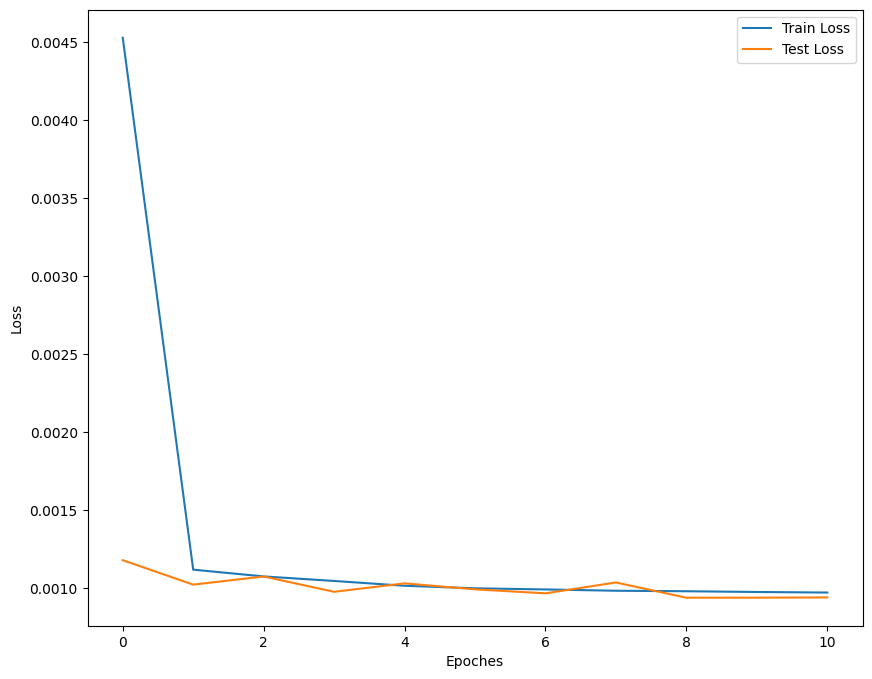

In [ ]:
# init. epochs
epoches = 11

house_lstm = LSTM(num_sensors = 6, hidden_units = 32).to(device)


optimizer = torch.optim.Adam(params = house_lstm.parameters(), lr = 1e-3)
house_lstm_train_loss, house_lstm_test_loss = [], []


torch.manual_seed(64)
torch.cuda.manual_seed(64)
for epoch in tqdm(range(epoches)):

  train_loss = train_loop(model = house_lstm, dataloader = train_dataloader,
                                    loss_fn = loss_fn, optimizer = optimizer, device = device)
  
  test_loss = test_loop(model = house_lstm, dataloader = test_dataloader,
                                  loss_fn = loss_fn, device = device)
  
  house_lstm_train_loss.append(train_loss.item())
  house_lstm_test_loss.append(test_loss.item())



  print(f"Epoch: {epoch+1}  Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

plot_graph(house_lstm_train_loss, house_lstm_test_loss)

In [ ]:
gc.collect()
torch.cuda.empty_cache()

## real global active power and predicted global active power

In [ ]:
model_val = eval_loop(model = house_lstm, dataloader = test_dataloader,
                                  loss_fn = loss_fn, device = device)

In [ ]:
model_val = np.c_[model_val]
model_val.shape

(409856, 1)

Text(0, 0.5, 'values')

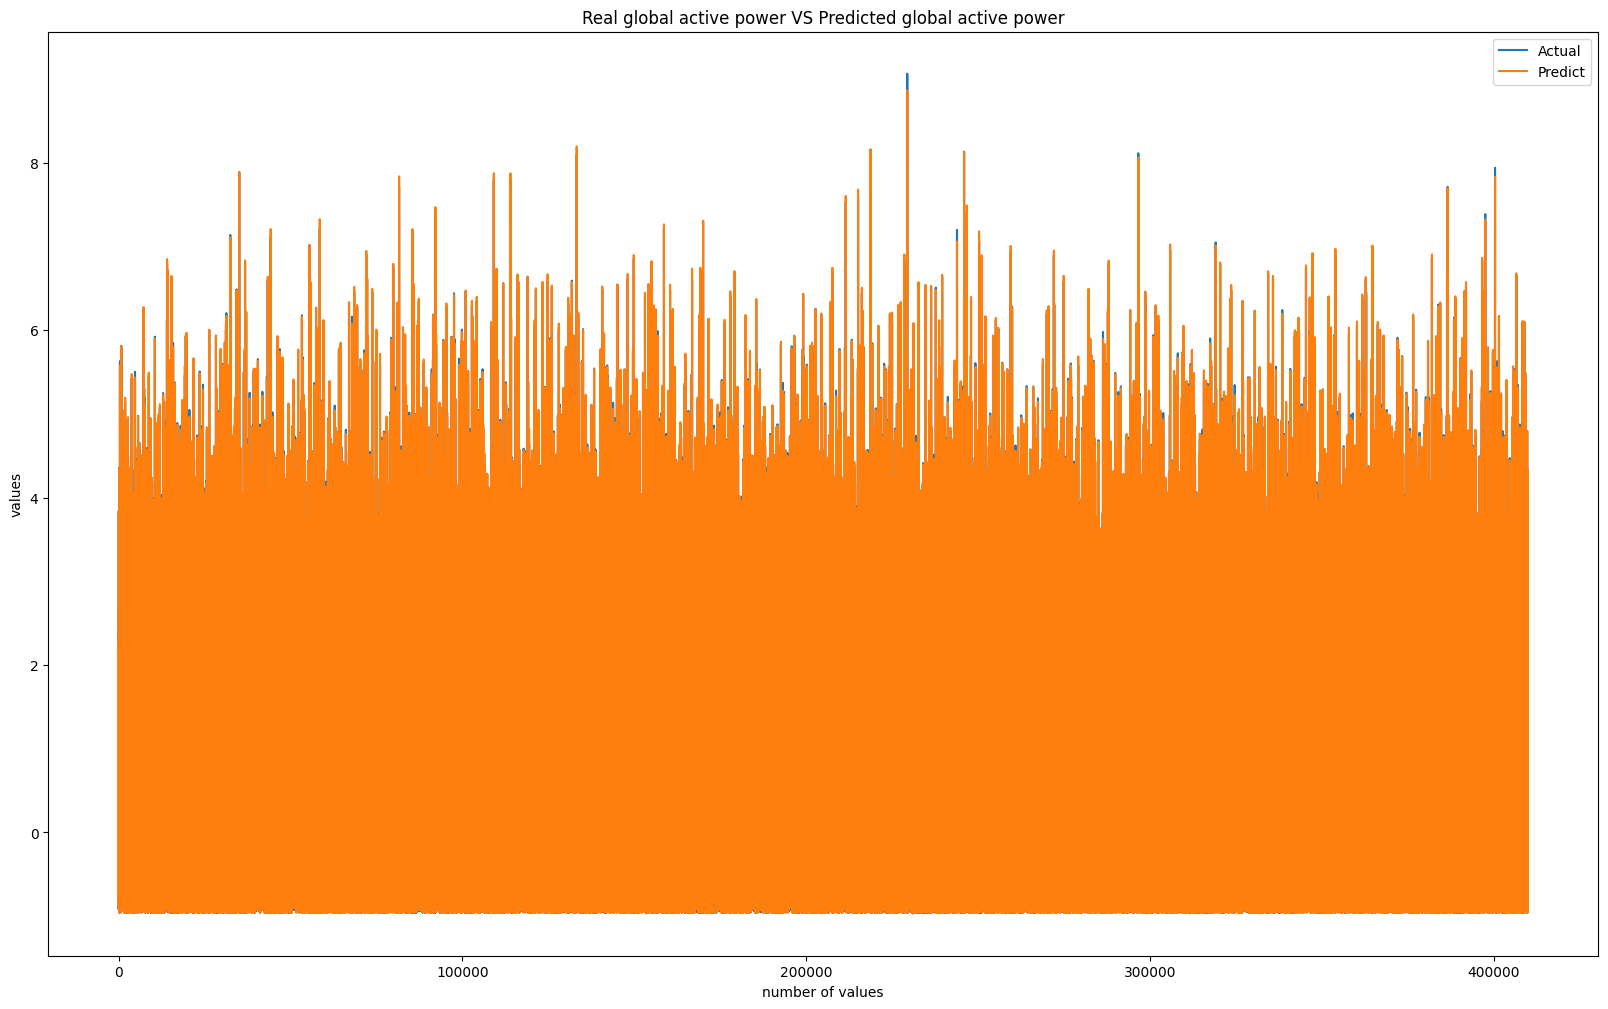

In [ ]:
plt.figure(figsize = (20, 12))
# plt.subplot(1, 2, 1)
plt.plot(range(len(y_test)), y_test, label = "Actual")
plt.plot(range(len(model_val)), model_val, label = "Predict")
plt.legend()
plt.title("Real global active power VS Predicted global active power")
plt.xlabel("number of values")
plt.ylabel("values")

In [ ]:
gc.collect()
torch.cuda.empty_cache()

# Splite dataset into 70:30

In [ ]:
info = info.astype(float)

In [ ]:
info_numpy = info.to_numpy()
x = info_numpy[:,1:]
y = info_numpy[:,0:1]

print(x)
print()
print(y)

[[  0.418 234.84   18.4     0.      1.     17.   ]
 [  0.436 233.63   23.      0.      1.     16.   ]
 [  0.498 233.29   23.      0.      2.     17.   ]
 ...
 [  0.    239.82    3.8     0.      0.      0.   ]
 [  0.    239.7     3.8     0.      0.      0.   ]
 [  0.    239.55    3.8     0.      0.      0.   ]]

[[4.216]
 [5.36 ]
 [5.374]
 ...
 [0.938]
 [0.934]
 [0.932]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=64)

### Now Apply standard scaller on train and test data

In [ ]:
data_scaler = StandardScaler()
x_train = data_scaler.fit_transform(x_train)
x_test = data_scaler.transform(x_test)


# info_scaler = pd.DataFrame(info_scaler, columns=['Global_active_power','Global_reactive_power','Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
print(x_train)
print()
print(x_test)

[[-1.09712332 -1.70455845 -0.90635566 -0.18173745 -0.222824   -0.76565432]
 [-1.09712332  0.83558435 -0.77122229 -0.18173745 -0.222824   -0.76565432]
 [-1.09712332  0.25533302 -0.81626675 -0.18173745 -0.222824   -0.76565432]
 ...
 [-1.09712332 -0.01318754 -0.99644457 -0.18173745 -0.222824   -0.64712314]
 [ 0.42858012  0.011504    0.67020028 -0.18173745 -0.222824    1.48643812]
 [ 1.72365397 -0.07800285 -0.23068883 -0.18173745 -0.05102314 -0.76565432]]

[[ 2.14943167e+00 -8.92823874e-01  2.29180068e+00 -1.81737448e-01
   1.20777719e-01 -7.65654320e-01]
 [ 8.72098559e-01 -4.26770942e-01  3.54889094e-01 -1.81737448e-01
   1.20777719e-01  1.36790694e+00]
 [-3.16530864e-01 -1.76320087e+00 -7.26177839e-01 -1.81737448e-01
  -2.22824002e-01 -7.65654320e-01]
 ...
 [-1.09712332e+00  2.90658778e+00 -8.16266750e-01 -1.81737448e-01
  -2.22824002e-01 -7.65654320e-01]
 [-2.27827176e-01  1.32632883e+00 -4.55911105e-01 -1.81737448e-01
  -2.22824002e-01 -7.65654320e-01]
 [ 2.80241364e-03 -2.35411460e-01

In [ ]:
pred_scaler = StandardScaler()
pred_scaler.fit(y_train)
y_train = pred_scaler.fit_transform(y_train)
y_test = pred_scaler.transform(y_test)


print(y_train)
print()
print(y_test)

[[-0.91908343]
 [-0.79411737]
 [-0.80926478]
 ...
 [-0.95695193]
 [ 0.71494242]
 [-0.27910575]]

[[ 2.30920634]
 [ 0.35708508]
 [-0.73731462]
 ...
 [-0.79033052]
 [-0.40596523]
 [-0.8263056 ]]


## Make DataLoader

In [ ]:
BATCH_SIZE = 64

train_dataloader = numpy_to_dataLoader(x_train, y_train, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = numpy_to_dataLoader(x_test, y_test, batch_size = BATCH_SIZE, shuffle = False)

## Train Model

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch: 1  Train Loss: 0.0051 | Test Loss: 0.0013
Epoch: 2  Train Loss: 0.0011 | Test Loss: 0.0011
Epoch: 3  Train Loss: 0.0011 | Test Loss: 0.0011
Epoch: 4  Train Loss: 0.0010 | Test Loss: 0.0012
Epoch: 5  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 6  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 7  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 8  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 9  Train Loss: 0.0010 | Test Loss: 0.0009
Epoch: 10  Train Loss: 0.0010 | Test Loss: 0.0010
Epoch: 11  Train Loss: 0.0010 | Test Loss: 0.0010


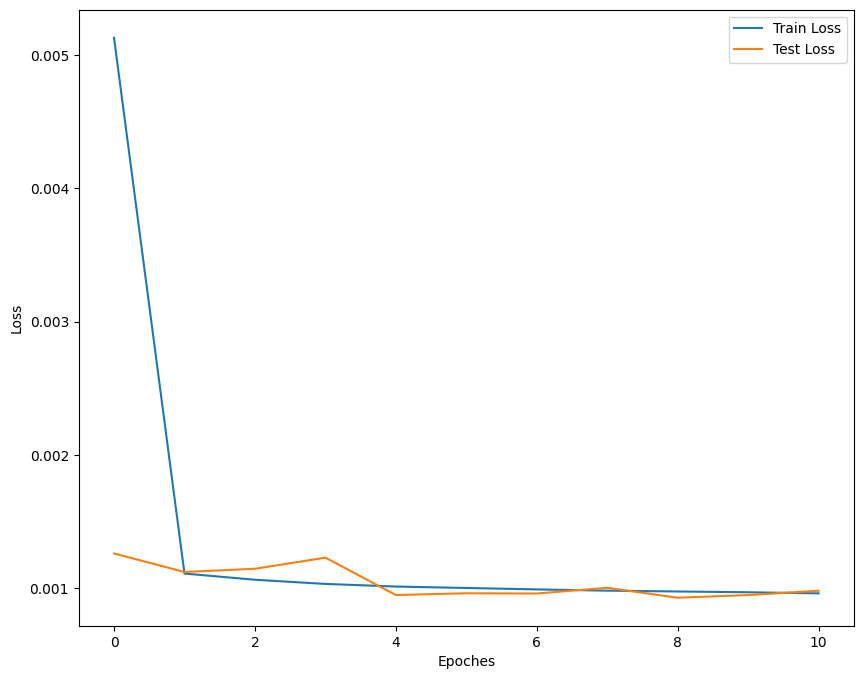

In [ ]:
# init. epochs
epoches = 11

house_lstm = LSTM(num_sensors = 6, hidden_units = 32).to(device)


optimizer = torch.optim.Adam(params = house_lstm.parameters(), lr = 1e-3)
house_lstm_train_loss, house_lstm_test_loss = [], []
house_lstm_train_accs, house_lstm_test_accs = [], []


torch.manual_seed(64)
torch.cuda.manual_seed(64)
for epoch in tqdm(range(epoches)):

  train_loss = train_loop(model = house_lstm, dataloader = train_dataloader,
                                    loss_fn = loss_fn, optimizer = optimizer, device = device)
  
  test_loss = test_loop(model = house_lstm, dataloader = test_dataloader,
                                  loss_fn = loss_fn, device = device)
  
  house_lstm_train_loss.append(train_loss.item())
  house_lstm_test_loss.append(test_loss.item())


  print(f"Epoch: {epoch+1}  Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

plot_graph(house_lstm_train_loss, house_lstm_test_loss)

In [ ]:
gc.collect()
torch.cuda.empty_cache()

## real global active power and predicted global active power

In [ ]:
model_val = eval_loop(model = house_lstm, dataloader = test_dataloader,
                                  loss_fn = loss_fn, device = device)

In [ ]:
model_val = np.c_[model_val]
model_val.shape

(614784, 1)

Text(0, 0.5, 'values')

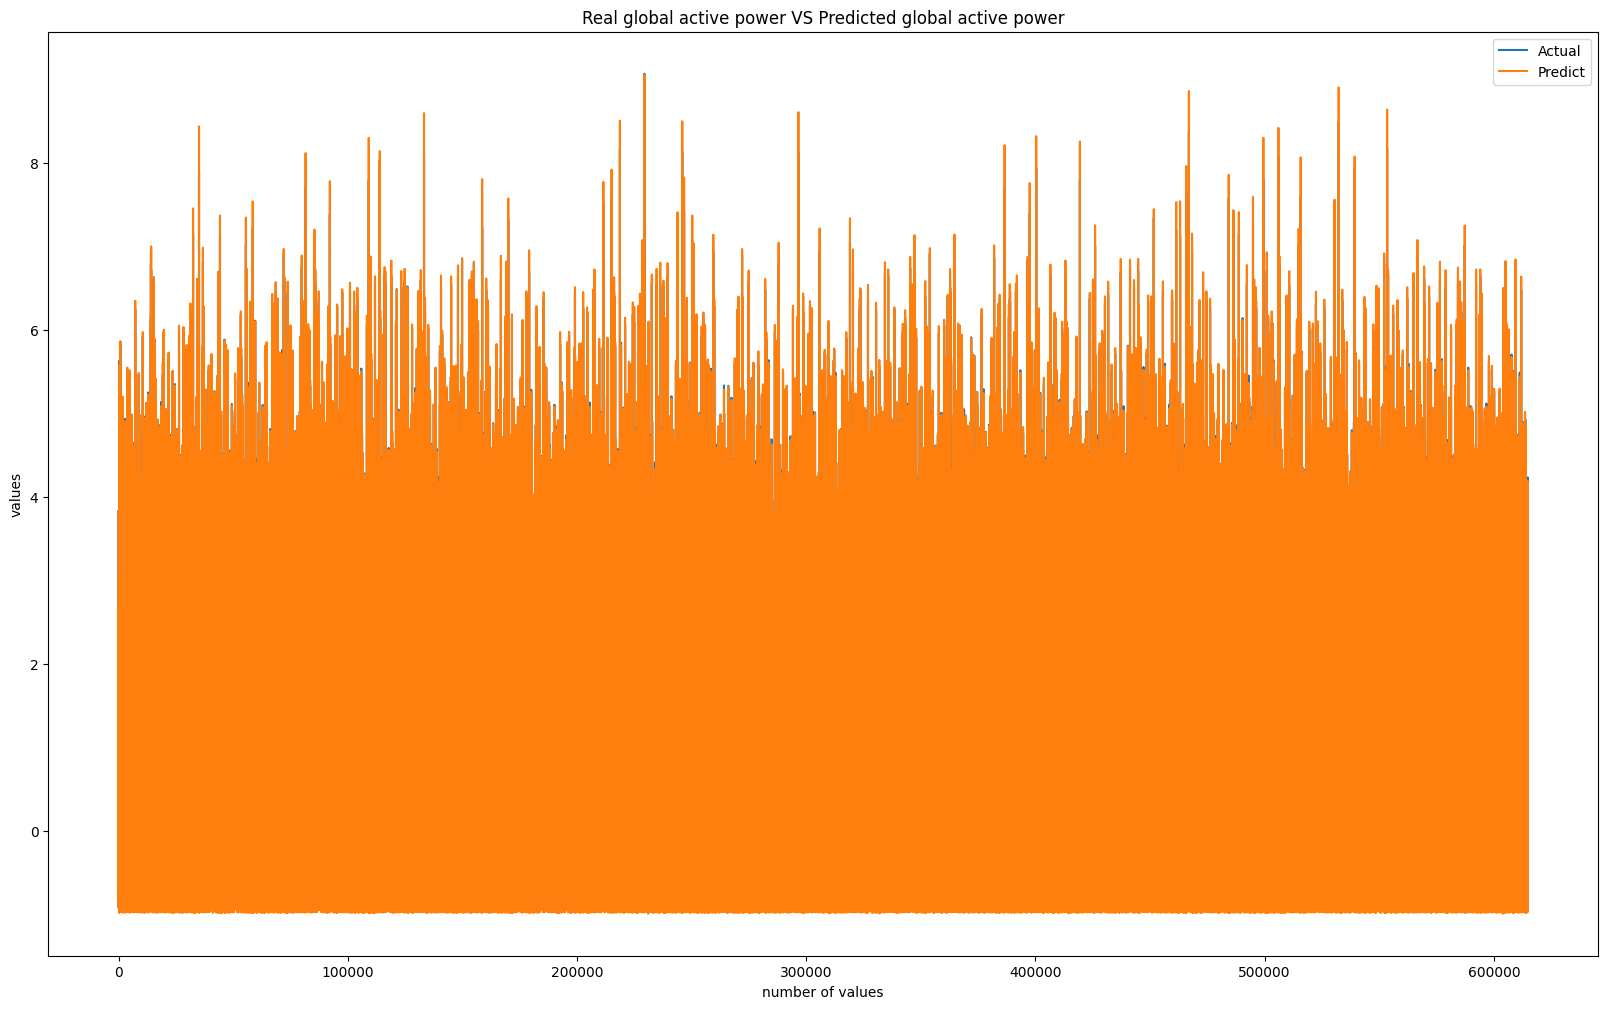

In [ ]:
plt.figure(figsize = (20, 12))
# plt.subplot(1, 2, 1)
plt.plot(range(len(y_test)), y_test, label = "Actual")
plt.plot(range(len(model_val)), model_val, label = "Predict")
plt.legend()
plt.title("Real global active power VS Predicted global active power")
plt.xlabel("number of values")
plt.ylabel("values")

In [ ]:
gc.collect()
torch.cuda.empty_cache()